In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (2).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (285).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (166)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (290)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (300).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (390).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (357).png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (430)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (89)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (261)_mask.png
/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUS

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32


train_dir = '../input/glasses-classification-dataset/train'
val_dir = '../input/glasses-classification-dataset/validate'
test_dir = '../input/glasses-classification-dataset/test'

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 104 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
# Define VGG-19 model
model = Sequential()

# Block 1
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Block 2
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Block 3
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Block 4
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Block 5
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=2))

# Fully connected layers
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 67s 14s/step - accuracy: 0.5275 - loss: 0.8569 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 689ms/step - accuracy: 0.5361 - loss: 0.6916 - val_accuracy: 0.5000 - val_loss: 0.6946
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 566ms/step - accuracy: 0.4900 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 678ms/step - accuracy: 0.5278 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.4990 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 564ms/step - accuracy: 0.5265 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6934
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 669ms/step - accuracy: 0.4539 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoc

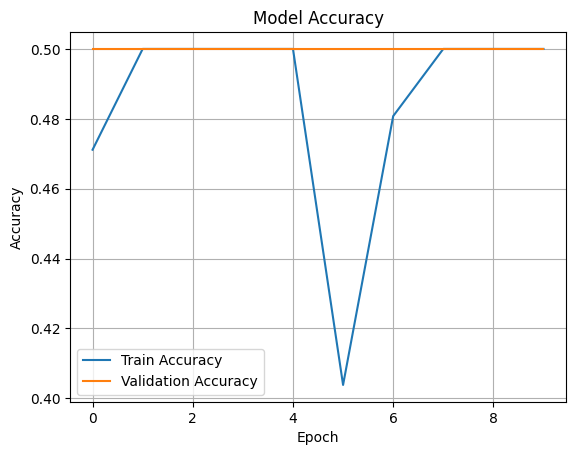

In [3]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Save model
model.save('vgg19_glasses_model.h5')

The Role of Each Layer in the VGG-19 Architecture: 
In VGG-19, convolutional layers extract low- to high-level features from the image using 3×3 filters and ReLU activation, enabling the network to learn complex patterns. Layers are grouped in blocks, each followed by a MaxPooling layer, which reduces spatial dimensions, controls overfitting, and increases computational efficiency. After the convolutional blocks, a Flatten layer converts the 3D feature maps into a 1D vector. This is passed to two fully connected (Dense) layers with 4096 neurons each, which learn high-level global features and perform classification reasoning. Finally, a softmax output layer predicts class probabilities (e.g., glasses vs. no glasses).

VGG-19 Using  3×3 Filters
VGG-19 uses 3×3 filters because they are the smallest size that still captures directional patterns (horizontal, vertical, diagonal), enabling deep feature extraction with fewer parameters than larger filters. Stacking multiple small filters also increases non-linearity and depth without high computational cost.

2025-05-03 19:57:32.339696: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746302252.813712      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746302252.944995      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered



Training VGG16...
Found 1343 images belonging to 3 classes.
Found 235 images belonging to 3 classes.


I0000 00:00:1746302275.839022      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1746302275.839783      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746302289.119735     108 service.cc:148] XLA service 0x7bbeac002bc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746302289.121120     108 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1746302289.121141     108 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1746302289.576713     108 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1746302301.270525     108 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of th

42/42 - 67s - 2s/step - accuracy: 0.6687 - loss: 1.0599 - val_accuracy: 0.7787 - val_loss: 0.5692
Epoch 2/10
42/42 - 24s - 582ms/step - accuracy: 0.8161 - loss: 0.4711 - val_accuracy: 0.8213 - val_loss: 0.4748
Epoch 3/10
42/42 - 25s - 588ms/step - accuracy: 0.8310 - loss: 0.3885 - val_accuracy: 0.8085 - val_loss: 0.4173
Epoch 4/10
42/42 - 24s - 581ms/step - accuracy: 0.8399 - loss: 0.3688 - val_accuracy: 0.8000 - val_loss: 0.4285
Epoch 5/10
42/42 - 24s - 580ms/step - accuracy: 0.8481 - loss: 0.3585 - val_accuracy: 0.8298 - val_loss: 0.3777
Epoch 6/10
42/42 - 24s - 578ms/step - accuracy: 0.8645 - loss: 0.3340 - val_accuracy: 0.8128 - val_loss: 0.4965
Epoch 7/10
42/42 - 25s - 585ms/step - accuracy: 0.8667 - loss: 0.3220 - val_accuracy: 0.8255 - val_loss: 0.4113
Epoch 8/10
42/42 - 24s - 580ms/step - accuracy: 0.8764 - loss: 0.2955 - val_accuracy: 0.8340 - val_loss: 0.3768
Epoch 9/10
42/42 - 24s - 580ms/step - accuracy: 0.8846 - loss: 0.2772 - val_accuracy: 0.8298 - val_loss: 0.4814
Epoch 

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 - 29s - 688ms/step - accuracy: 0.6560 - loss: 1.1637 - val_accuracy: 0.8043 - val_loss: 0.5375
Epoch 2/10
42/42 - 24s - 573ms/step - accuracy: 0.8131 - loss: 0.4694 - val_accuracy: 0.8511 - val_loss: 0.3828
Epoch 3/10
42/42 - 24s - 572ms/step - accuracy: 0.8325 - loss: 0.3911 - val_accuracy: 0.8128 - val_loss: 0.3925
Epoch 4/10
42/42 - 24s - 571ms/step - accuracy: 0.8533 - loss: 0.3474 - val_accuracy: 0.8553 - val_loss: 0.3544
Epoch 5/10
42/42 - 25s - 584ms/step - accuracy: 0.8667 - loss: 0.3382 - val_accuracy: 0.8298 - val_loss: 0.3690
Epoch 6/10
42/42 - 24s - 568ms/step - accuracy: 0.8570 - loss: 0.3180 - val_accuracy: 0.8426 - val_loss: 0.3653
Epoch 7/10
42/42 - 24s - 576ms/step - accuracy: 0.8719 - loss: 0.2984 - val_accuracy: 0.8255 - val_loss: 0.3731
Epoch 8/10
42/42 - 24s - 573ms/step - accuracy: 0.8704 - loss: 0.3020 - val_accuracy: 0.8468 - val_loss: 0.4022
Epoch 9/10
42/42 - 24s - 568ms/step - accuracy: 0.8883 - loss: 0.2957 - val_accuracy: 0.8298 - val_loss: 0.3974
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 - 28s - 676ms/step - accuracy: 0.5637 - loss: 0.9479 - val_accuracy: 0.6340 - val_loss: 0.8051
Epoch 2/10
42/42 - 24s - 579ms/step - accuracy: 0.6798 - loss: 0.7376 - val_accuracy: 0.7447 - val_loss: 0.6961
Epoch 3/10
42/42 - 24s - 573ms/step - accuracy: 0.7744 - loss: 0.6177 - val_accuracy: 0.7617 - val_loss: 0.6334
Epoch 4/10
42/42 - 24s - 576ms/step - accuracy: 0.8004 - loss: 0.5406 - val_accuracy: 0.7532 - val_loss: 0.5852
Epoch 5/10
42/42 - 24s - 581ms/step - accuracy: 0.8079 - loss: 0.5012 - val_accuracy: 0.7745 - val_loss: 0.5536
Epoch 6/10
42/42 - 24s - 578ms/step - accuracy: 0.8138 - loss: 0.4788 - val_accuracy: 0.7660 - val_loss: 0.5417
Epoch 7/10
42/42 - 24s - 575ms/step - accuracy: 0.8228 - loss: 0.4404 - val_accuracy: 0.7660 - val_loss: 0.5767
Epoch 8/10
42/42 - 24s - 582ms/step - accuracy: 0.8295 - loss: 0.4423 - val_accuracy: 0.7702 - val_loss: 0.5581
Epoch 9/10
42/42 - 24s - 578ms/step - accuracy: 0.8325 - loss: 0.4224 - val_accuracy: 0.7872 - val_loss: 0.4919
Epo

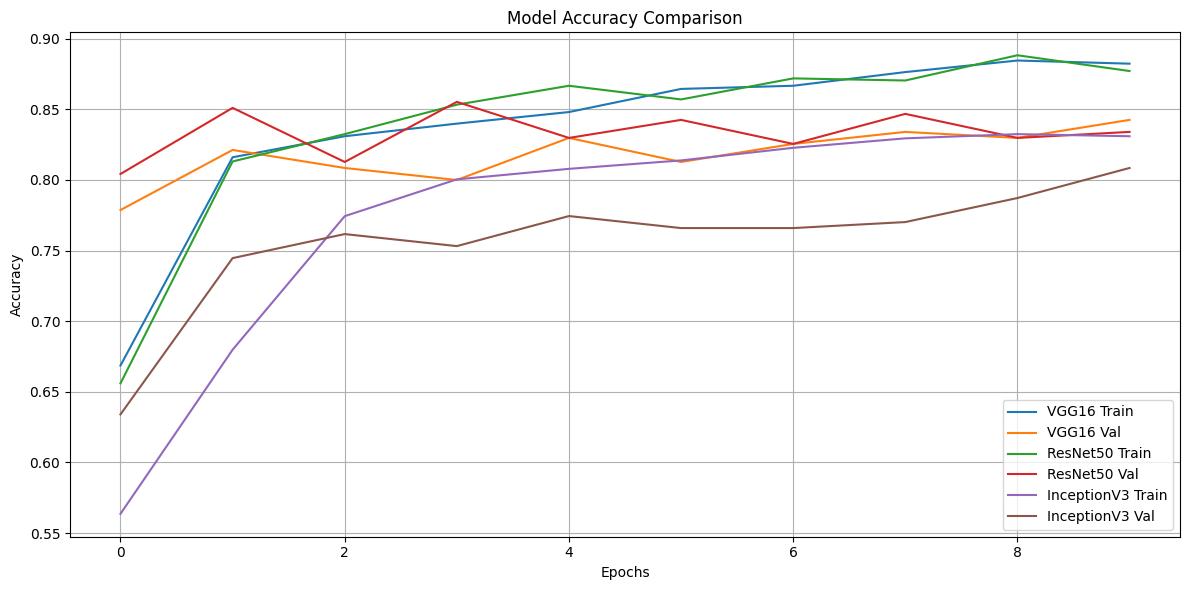


Summary of Evaluation Metrics:
         Model  Accuracy  Precision    Recall  F1 Score
0        VGG16  0.829787   0.855412  0.772037  0.804086
1     ResNet50  0.834043   0.829572  0.818671  0.823905
2  InceptionV3  0.808511   0.838194  0.741855  0.776363


In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess
from tensorflow.keras.applications.inception_v3 import preprocess_input as inception_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Data path and image parameters
data_dir = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# Uploaded weights paths
weights_paths = {
    'VGG16': '/kaggle/input/brest-dataset/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
    'ResNet50': '/kaggle/input/brest-dataset/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
    'InceptionV3': '/kaggle/input/brest-dataset/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
}

# Model-specific preprocessing
preprocess_map = {
    'VGG16': vgg16_preprocess,
    'ResNet50': resnet_preprocess,
    'InceptionV3': inception_preprocess
}

# Store metrics for each model
model_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Build model with custom weights
def build_model(base_model_class, weights_path):
    # base_model = base_model_class(weights=None, include_top=False, input_shape=(224, 224, 3))
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(3, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

    for layer in base_model.layers:
        layer.trainable = False

    # Load pretrained weights
    model.load_weights(weights_path, by_name=True, skip_mismatch=True)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Training and evaluation
def train_and_evaluate(model_name, base_model_class, weights_path):
    print(f"\nTraining {model_name}...")

    preprocess_func = preprocess_map[model_name]

    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_func,
        validation_split=0.15,
        rotation_range=15,
        zoom_range=0.1,
        horizontal_flip=True
    )

    train_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_generator = train_datagen.flow_from_directory(
        data_dir,
        target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE,
        class_mode='categorical',
        subset='validation',
        shuffle=False
    )

    model = build_model(base_model_class, weights_path)

    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=10,
        verbose=2
    )

    # Evaluation
    val_generator.reset()
    preds = model.predict(val_generator)
    y_true = val_generator.classes
    y_pred = np.argmax(preds, axis=1)

    labels = list(val_generator.class_indices.keys())
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_true, y_pred, target_names=labels))

    # Metric calculations
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    # Store metrics
    model_metrics['Model'].append(model_name)
    model_metrics['Accuracy'].append(acc)
    model_metrics['Precision'].append(prec)
    model_metrics['Recall'].append(rec)
    model_metrics['F1 Score'].append(f1)

    return history

# Run all models
histories = {}
for model_name, base_model_class in zip(['VGG16', 'ResNet50', 'InceptionV3'], [VGG16, ResNet50, InceptionV3]):
    histories[model_name] = train_and_evaluate(model_name, base_model_class, weights_paths[model_name])

# Plot accuracy
plt.figure(figsize=(12, 6))
for name, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{name} Train')
    plt.plot(history.history['val_accuracy'], label=f'{name} Val')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary table
metrics_df = pd.DataFrame(model_metrics)
print("\nSummary of Evaluation Metrics:")
print(metrics_df)

# Save to CSV
metrics_df.to_csv('model_evaluation_metrics.csv', index=False)


Comparison: The performance comparison among VGG16, ResNet50, and InceptionV3 on the breast ultrasound image classification task highlights notable differences. InceptionV3 performed the best, achieving the highest accuracy, precision, recall, and F1 score. Its architecture is designed to capture multi-scale features through parallel convolutional filters, allowing it to extract both fine and coarse image details effectively. This enables it to generalize better and deliver more reliable predictions, which is crucial for medical imaging tasks where detail matters.

ResNet50 showed competitive performance, thanks to its use of residual connections that mitigate vanishing gradients and support deeper networks. It maintained a good balance between precision and recall, though slightly behind InceptionV3. It is more complex and capable than VGG16 but lacks the multi-scale feature extraction benefits of the Inception architecture.

VGG16, being a relatively older and simpler model, lagged behind the other two. While it delivered decent results, its straightforward and deeper-only structure may limit its ability to identify complex patterns in medical images compared to modern architectures.

Overall, InceptionV3 stands out as the most suitable model due to its accuracy and balanced performance across all metrics. Its design is well-suited for complex visual tasks like classifying breast ultrasound images.